# Filtering Structures of ColE1 RNAI LoopI

### Contents

__Preparing data__
* [Packages](#packages)
* [Functions](#prepfunctions)
* [WT-Parameters](#WT_parameters)
* [preparing Sequences for Filtering](#dataPrep)

__Filtering__
* [Functions](#FilterPckgs)
* [Loop](#Loop)
* [Stem](#Stem)
* [Filtering & Clustering](#filtering)

<a id='packages'></a>

In [1]:
using Pkg
Pkg.activate("/Users/marlenewerner/Desktop/Diplom/Code for Analysis/RNA_structure_loops")

  Activating project at `~/Desktop/Diplom/Code for Analysis/RNA_structure_loops`


In [1]:
## Packages needed to run the data clean up
using DataFrames
using CSV
using FASTX
using BioAlignments
using BioSequences
using Random
using StatsBase
using StatsPlots
using Combinatorics
using ViennaRNA
using Unitful
using Clustering
using PlotRNA
using DelimitedFiles
using Plots

[ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
Precompiling StatsBase
  ✓ LogExpFunctions
  ✓ StatsBase
  2 dependencies successfully precompiled in 2 seconds. 13 already precompiled.
[ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]
[ Info: Precompiling DistributionsTestExt [ffbe0ea5-a612-5ff7-aaf5-cac02eef3019]
Precompiling UnitfulExt
  ✓ OpenSSL
  ✓ HTTP
  ✓ Plots → UnitfulExt
  3 dependencies successfully precompiled in 5 seconds. 145 already precompiled.
[ Info: Precompiling DataFramesExt [9e668153-f473-5010-85ff-a85cbe3b95ea]
[ Info: Precompiling PlotRNA [eab79ae3-43af-4078-b4a3-b180fd2797a7]
[ Info: Precompiling FileIOExt [f5f51d8f-5827-5d2e-939b-192fcd6ec70c]


In [2]:
WT_RNAI_Seq = "ACAAAAAAACCACCGCTACCAGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCAAATACTGT"

## Loop1 parameters
upstream = "CGTAATCTGCTGCTTGCAAA"
downstream = "CGGATCAAGAG"

## Sequence missing from LoopI to generate the full-length RNAI
wildtype = "ACAAAAAAACCACCGCTACCAGCGGTGGTTTGTTTGCC"
downstream_RNAI = "GGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCAAATACTGT"


WT_structure = ".((((.((((((((((.....)))))))))).))))."
wild_type_pattern = "1-4-1-10-5-10-1-4-1"

"1-4-1-10-5-10-1-4-1"

<a id='prepfunctions'></a>

In [4]:
L1L1save_name = "/Users/marlenewerner/Desktop/Diplom/Labo Work/Code for Analysis/RNA_structure_loops/L1_long1/AllStructureAnalysis_Old_large_Loop1_rc.csv"
L1L1lib_StructureAnalysis = CSV.read(L1L1save_name, DataFrame);

L1M2save_name = "/Users/marlenewerner/Desktop/Diplom/Labo Work/Code for Analysis/RNA_structure_loops/L1_medium2/AllStructureAnalysis_Old_medium_Loop1_rc.csv"
L1M2lib_StructureAnalysis = CSV.read(L1M2save_name, DataFrame);

L1S1save_name = "/Users/marlenewerner/Desktop/Diplom/Labo Work/Code for Analysis/RNA_structure_loops/L1_short1/AllStructureAnalysis_Old_short_Loop1_rc.csv"
L1S1lib_StructureAnalysis = CSV.read(L1S1save_name, DataFrame);

In [9]:
transform!(L1L1lib_StructureAnalysis, :Sequence_number => ByRow(number -> "L1L1_$number") => :Lib_Sequence_number)
transform!(L1M2lib_StructureAnalysis, :Sequence_number => ByRow(number -> "L1M2_$number") => :Lib_Sequence_number)
transform!(L1S1lib_StructureAnalysis, :Sequence_number => ByRow(number -> "L1S1_$number") => :Lib_Sequence_number)

Row,Sequence_number,Loop1_description,MFE_SUBstructure,LoopI,Loop_length,Count,WT,MFE_structure,MFE_energy,Mbp_dist,Seq_Cluster,Str_Cluster,Lib_Sequence_number
,Int64,String,String,String,Int64,Int64,String7,String,Float64,Float64,Int64,Int64,String
1,2,8-4-1-3-6-2,........((((.(((......)),ACAAAAAAACGGGGGTTTGTTTGCC,25,72,false,........((((.(((......)))(((..(((((.......)))))..)))...((((.(((((((.....)))).))).)))).....)))),-25.2,9.94961,0,0,L1S1_2
2,3,10-7-6-2,..........(((((((......)),ACAAAAAAACGCGGGGTTTGTTTGCC,26,59,false,..........(((((((......)))(((..(((((.......)))))..)))...((((.(((((((.....)))).))).)))).....)))),-25.5,10.4824,0,0,L1S1_3
3,4,3-9-4-5-4,(((.........((((.....)))),ACAAAAAAACGCGCGGTTTGTTTGCC,26,52,false,(((.........((((.....))))((((..(((((.......)))))..))))..((((.(((((((.....)))).))).))))......))),-24.1,10.9789,0,0,L1S1_4
4,5,3-7-6-4-5,(((.......((((((....))))),ACAAAAAAACGGCGGGTTTGTTTGCC,26,46,false,(((.......((((((....))))))(((..(((((.......)))))..)))...((((.(((((((.....)))).))).))))......))),-25.1,9.76705,0,0,L1S1_5
5,6,5-10-5-4,(((((..........)))))....,ACAAAAAAACCCCGGTTTGTTTGCC,25,44,false,(((((..........)))))....((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-23.6,12.8212,0,0,L1S1_6
6,7,1-4-1-7-4-7-1-4-1,.((((.(((((((....))))))).)))).,ACAAAAAAACCCCATCAGGGGTTTGTTTGCC,31,35,false,.((((.(((((((....))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-34.6,4.90421,0,0,L1S1_7
7,8,3-7-6-4-5,(((.......((((((....))))),ACAAAAAAACGGCAGGTTTGTTTGCC,26,34,false,(((.......((((((....))))))(((..(((((.......)))))..)))...((((.(((((((.....)))).))).))))......))),-26.7,7.99497,0,0,L1S1_8
8,9,8-4-2-3-6-2,........((((..(((......)),ACAAAAAAACGGGGGGTTTGTTTGCC,26,32,false,........((((..(((......)))(((..(((((.......)))))..)))...((((.(((((((.....)))).))).)))).....)))),-25.2,10.7201,0,0,L1S1_9
9,10,3-7-5-5-4,(((.......(((((.....)))),ACAAAAAAACGGCGGTTTGTTTGCC,25,32,false,(((.......(((((.....)))))(((..(((((.......)))))..)))...((((.(((((((.....)))).))).))))......))),-25.2,9.3253,0,0,L1S1_10


In [6]:
lib_LM_StructAnalysis = vcat(L1L1lib_StructureAnalysis, L1M2lib_StructureAnalysis)
lib_AllStructAnalysis = vcat(lib_LM_StructAnalysis, L1S1lib_StructureAnalysis)

Row,Sequence_number,Loop1_description,MFE_SUBstructure,LoopI,Loop_length,Count,WT,MFE_structure,MFE_energy,Mbp_dist,Seq_Cluster,Str_Cluster,Lib_Sequence_number
,Int64,String,String,String,Int64,Int64,String7,String,Float64,Float64,Int64,Int64,String
1,1,1-4-1-8-3-8-1-4-1,.((((.((((((((...)))))))).)))).,ACAAAAAAACCACCGGCGGTGGTTTGTTTGCC,32,1387,false,.((((.((((((((...)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-33.2,4.98169,0,0,L1L_1
2,2,1-4-1-8-4-8-1-4-1,.((((.((((((((....)))))))).)))).,ACAAAAAAACCACCGGGCGGTGGTTTGTTTGCC,33,649,false,.((((.((((((((....)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-35.6,4.9037,0,0,L1L_2
3,3,1-4-1-8-4-8-1-4-1,.((((.((((((((....)))))))).)))).,ACAAAAAAACCACCGAGCGGTGGTTTGTTTGCC,33,367,false,.((((.((((((((....)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-35.6,4.90369,0,0,L1L_3
4,4,1-4-1-8-5-8-1-4-1,.((((.((((((((.....)))))))).)))).,ACAAAAAAACCACCGGGGCGGTGGTTTGTTTGCC,34,146,false,.((((.((((((((.....)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-35.6,5.40284,0,0,L1L_4
5,5,1-4-1-8-5-8-1-4-1,.((((.((((((((.....)))))))).)))).,ACAAAAAAACCACCGGTGCGGTGGTTTGTTTGCC,34,116,false,.((((.((((((((.....)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-35.6,5.40283,0,0,L1L_5
6,6,1-4-1-8-5-8-1-4-1,.((((.((((((((.....)))))))).)))).,ACAAAAAAACCACCGGCGCGGTGGTTTGTTTGCC,34,76,false,.((((.((((((((.....)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-35.6,5.40283,0,0,L1L_6
7,7,1-4-1-8-5-8-1-4-1,.((((.((((((((.....)))))))).)))).,ACAAAAAAACCACCGATGCGGTGGTTTGTTTGCC,34,74,false,.((((.((((((((.....)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-35.6,5.40282,0,0,L1L_7
8,8,1-4-1-8-5-8-1-4-1,.((((.((((((((.....)))))))).)))).,ACAAAAAAACCACCGAGGCGGTGGTTTGTTTGCC,34,69,false,.((((.((((((((.....)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-35.6,5.40283,0,0,L1L_8
9,9,1-4-1-8-5-8-1-4-1,.((((.((((((((.....)))))))).)))).,ACAAAAAAACCACCGGAGCGGTGGTTTGTTTGCC,34,68,false,.((((.((((((((.....)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-35.6,5.40282,0,0,L1L_9


In [3]:
## Convenient place to safe the resulting dataframe for easy accessibilty

save_name = "lib_L1_StructureAnalysis" * ".csv"


## Saving results
#CSV.write(save_name, lib_AllStructAnalysis)

## Opening saved results
lib_L1_StructureAnalysis = CSV.read(save_name, DataFrame);

## Filtering Loop & Stem Structures

In [4]:
import Pkg; 
Pkg.add("Plots")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Diplom/Labo Work/Code for Analysis/RNA_structure_loops/L1_zmerged/Project.toml`
  No Changes to `~/Desktop/Diplom/Labo Work/Code for Analysis/RNA_structure_loops/L1_zmerged/Manifest.toml`
Precompiling project...
  ✓ UnitedStructAnalysis
  1 dependency successfully precompiled in 1 seconds. 150 already precompiled.


In [5]:
# functions to determin the loop (x) or upperStem (y) length in the LoopI description
function find_y_values(strings::Vector{String})
    y_values = Set{Int}()

    for str in strings
        # Extract the y value from the string
        match_result = match(r"1-4-1-\d+-(\d+)-\d+-1-4-1", str)
        
        if match_result !== nothing
            y_value = parse(Int, match_result.captures[1])
            push!(y_values, y_value)
        end
    end

    return y_values
end


function find_x_values(input::Union{String, Vector{String}})
    # Create a set to store unique y values
    x_values = Vector{Int}()

    if isa(input, String)
        # If input is a single string, process it directly
        find_x_value(input, x_values)
    elseif isa(input, Vector{String})
        # If input is a vector of strings, process each string
        for str in input
            find_x_value(str, x_values)
        end
    else
        throw(ArgumentError("Input must be a String or Vector{String}"))
    end

    # Return the set of unique x values
    return x_values
end

function find_x_value(str::String, x_values::Vector{Int})
    # Extract the x value from the string using a regular expression
    match_result = match(r"1-4-1-(\d+)-\d+-\d+-1-4-1", str)
    
    # Check if a match was found
    if match_result !== nothing
        # Parse the captured y value as an integer
        x_value = parse(Int, match_result.captures[1])
        if x_value ∉ x_values
            # Add the y value to the set
            push!(x_values, x_value)
        end
    end
end


find_x_value (generic function with 1 method)

#### Loop

In [6]:
search_set_loop = []
for n = 1: 20
    wt_pre = "1-4-1-10-"
    #wt_loop = "-5-"
    wt_pos = "-10-1-4-1"
    
    new_item = wt_pre * "$(n)" * wt_pos
    push!(search_set_loop, new_item)
end
search_set_loop

20-element Vector{Any}:
 "1-4-1-10-1-10-1-4-1"
 "1-4-1-10-2-10-1-4-1"
 "1-4-1-10-3-10-1-4-1"
 "1-4-1-10-4-10-1-4-1"
 "1-4-1-10-5-10-1-4-1"
 "1-4-1-10-6-10-1-4-1"
 "1-4-1-10-7-10-1-4-1"
 "1-4-1-10-8-10-1-4-1"
 "1-4-1-10-9-10-1-4-1"
 "1-4-1-10-10-10-1-4-1"
 "1-4-1-10-11-10-1-4-1"
 "1-4-1-10-12-10-1-4-1"
 "1-4-1-10-13-10-1-4-1"
 "1-4-1-10-14-10-1-4-1"
 "1-4-1-10-15-10-1-4-1"
 "1-4-1-10-16-10-1-4-1"
 "1-4-1-10-17-10-1-4-1"
 "1-4-1-10-18-10-1-4-1"
 "1-4-1-10-19-10-1-4-1"
 "1-4-1-10-20-10-1-4-1"

In [7]:
ForLoopAnalysis = filter(:Loop1_description => n -> n ∈ search_set_loop, lib_L1_StructureAnalysis)
sort!(ForLoopAnalysis, [:MFE_energy, :Mbp_dist])

Row,Sequence_number,Loop1_description,MFE_SUBstructure,LoopI,Loop_length,Count,WT,MFE_structure,MFE_energy,Mbp_dist,Seq_Cluster,Str_Cluster,Lib_Sequence_number
,Int64,String,String,String,Int64,Int64,String7,String,Float64,Float64,Int64,Int64,String15
1,18996,1-4-1-10-5-10-1-4-1,.((((.((((((((((.....)))))))))).)))).,ACAAAAAAACCACCGCGGCCAGCGGTGGTTTGTTTGCC,38,1,false,.((((.((((((((((.....)))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-42.4,4.90229,0,0,L1S1_18996
2,29678,1-4-1-10-7-10-1-4-1,.((((.((((((((((.......)))))))))).)))).,ACAAAAAAACCACCGCGGACTAAGCGGTGGTTTGTTTGCC,40,1,false,.((((.((((((((((.......)))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-42.4,4.90229,0,0,L1L1_29678
3,8904,1-4-1-10-14-10-1-4-1,.((((.((((((((((..............)))))))))).)))).,ACAAAAAAACCACCGCGCCTTTCAATTTAAGCGGTGGTTTGTTTGCC,47,1,false,.((((.((((((((((..............)))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-42.4,4.90742,0,0,L1L1_8904
4,16497,1-4-1-10-14-10-1-4-1,.((((.((((((((((..............)))))))))).)))).,ACAAAAAAACCACCGCGCTTCTAATTTCTAGCGGTGGTTTGTTTGCC,47,1,false,.((((.((((((((((..............)))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-42.4,4.90932,0,0,L1L1_16497
5,8384,1-4-1-10-12-10-1-4-1,.((((.((((((((((............)))))))))).)))).,ACAAAAAAACCACCGCGTCTCACATCAAGCGGTGGTTTGTTTGCC,45,1,false,.((((.((((((((((............)))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-42.4,4.91151,0,0,L1L1_8384
6,53016,1-4-1-10-14-10-1-4-1,.((((.((((((((((..............)))))))))).)))).,ACAAAAAAACCACCGCGCTCTTTTCACATAGCGGTGGTTTGTTTGCC,47,1,false,.((((.((((((((((..............)))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-42.4,4.92014,0,0,L1L1_53016
7,9989,1-4-1-10-14-10-1-4-1,.((((.((((((((((..............)))))))))).)))).,ACAAAAAAACCACCGCGAATGACTAGCCGAGCGGTGGTTTGTTTGCC,47,1,false,.((((.((((((((((..............)))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-42.4,4.92662,0,0,L1L1_9989
8,50917,1-4-1-10-14-10-1-4-1,.((((.((((((((((..............)))))))))).)))).,ACAAAAAAACCACCGCGTGAAGTGTGGGTAGCGGTGGTTTGTTTGCC,47,1,false,.((((.((((((((((..............)))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-42.4,4.93246,0,0,L1L1_50917
9,2333,1-4-1-10-14-10-1-4-1,.((((.((((((((((..............)))))))))).)))).,ACAAAAAAACCACCGCGATCTTGTCACTTAGCGGTGGTTTGTTTGCC,47,1,false,.((((.((((((((((..............)))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-42.4,4.93832,0,0,L1L1_2333


In [8]:
## sorting the structures with relative similarity by their actual Loop1_description
LoopSame_structure = []
for structure in ForLoopAnalysis.MFE_SUBstructure
    if structure ∉ LoopSame_structure && structure != wild_type_pattern
        push!(LoopSame_structure, structure)
    end
end
LoopSame_structure

14-element Vector{Any}:
 ".((((.((((((((((.....)))))))))).))))."
 ".((((.((((((((((.......)))))))))).))))."
 ".((((.((((((((((..............)))))))))).))))."
 ".((((.((((((((((............)))))))))).))))."
 ".((((.((((((((((...............)))))))))).))))."
 ".((((.((((((((((..........)))))))))).))))."
 ".((((.((((((((((.............)))))))))).))))."
 ".((((.((((((((((....)))))))))).))))."
 ".((((.((((((((((......)))))))))).))))."
 ".((((.((((((((((........)))))))))).))))."
 ".((((.((((((((((.........)))))))))).))))."
 ".((((.((((((((((...........)))))))))).))))."
 ".((((.((((((((((................)))))))))).))))."
 ".((((.((((((((((...)))))))))).))))."

In [9]:
## getting an overview on the loop sizes of the hairpin structures
y_range = find_y_values(ForLoopAnalysis.Loop1_description)

println("Range of Loop bases:")
println(sort!(collect(y_range)))

Range of Loop bases:
[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


In [18]:
Loop_ranges = Dict{Int64,Int64}()
for num in sort!(collect(y_range))
    Loop1_desc = "1-4-1-10-$(num)-10-1-4-1"
    seq_dataframe = filter(:Loop1_description => n -> n == Loop1_desc, lib_L1_StructureAnalysis)
    
    # Sum of the each Sequences count with the set hairpin description
    count_seq = 0
    for m = 1:nrow(seq_dataframe)
        count_seq += seq_dataframe.Count[m]
    end
    
    Loop_ranges[num] = count_seq
end
Loop_ranges

Dict{Int64, Int64} with 14 entries:
  5  => 257
  16 => 1
  12 => 58
  8  => 69
  6  => 1194
  11 => 40
  9  => 55
  14 => 4317
  3  => 122
  7  => 49
  4  => 67
  13 => 281
  15 => 9
  10 => 50

In [15]:
Loop_desc = "1-4-1-10-5-10-1-4-1"
filter(:Loop1_description => n -> n == Loop_desc, lib_L1_StructureAnalysis)

Row,Sequence_number,Loop1_description,MFE_SUBstructure,LoopI,Loop_length,Count,WT,MFE_structure,MFE_energy,Mbp_dist,Seq_Cluster,Str_Cluster,Lib_Sequence_number
,Int64,String,String,String,Int64,Int64,String7,String,Float64,Float64,Int64,Int64,String15
1,518,1-4-1-10-5-10-1-4-1,.((((.((((((((((.....)))))))))).)))).,ACAAAAAAACCACCGCCTTGTGCGGTGGTTTGTTTGCC,38,2,false,.((((.((((((((((.....)))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-40.9,4.9412,0,0,L1L1_518
2,821,1-4-1-10-5-10-1-4-1,.((((.((((((((((.....)))))))))).)))).,ACAAAAAAACCACCGTGATTAGCGGTGGTTTGTTTGCC,38,1,false,.((((.((((((((((.....)))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-39.9,4.92183,0,0,L1L1_821
3,1354,1-4-1-10-5-10-1-4-1,.((((.((((((((((.....)))))))))).)))).,ACAAAAAAACCACCGTATCCCGCGGTGGTTTGTTTGCC,38,1,false,.((((.((((((((((.....)))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-38.9,4.99138,0,0,L1L1_1354
4,1997,1-4-1-10-5-10-1-4-1,.((((.((((((((((.....)))))))))).)))).,ACAAAAAAACCACCGTGGAATGCGGTGGTTTGTTTGCC,38,1,false,.((((.((((((((((.....)))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-39.3,5.09228,0,0,L1L1_1997
5,2039,1-4-1-10-5-10-1-4-1,.((((.((((((((((.....)))))))))).)))).,ACAAAAAAACCACCGTTTATTGCGGTGGTTTGTTTGCC,38,1,false,.((((.((((((((((.....)))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-39.9,4.9251,0,0,L1L1_2039
6,3332,1-4-1-10-5-10-1-4-1,.((((.((((((((((.....)))))))))).)))).,ACAAAAAAACCACCGCTAAGGGCGGTGGTTTGTTTGCC,38,1,false,.((((.((((((((((.....)))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-40.5,5.40815,0,0,L1L1_3332
7,6070,1-4-1-10-5-10-1-4-1,.((((.((((((((((.....)))))))))).)))).,ACAAAAAAACCACCGCCATCCGCGGTGGTTTGTTTGCC,38,1,false,.((((.((((((((((.....)))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-41.2,4.9049,0,0,L1L1_6070
8,7548,1-4-1-10-5-10-1-4-1,.((((.((((((((((.....)))))))))).)))).,ACAAAAAAACCACCGTCTCTCGCGGTGGTTTGTTTGCC,38,1,false,.((((.((((((((((.....)))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-39.1,5.14814,0,0,L1L1_7548
9,8534,1-4-1-10-5-10-1-4-1,.((((.((((((((((.....)))))))))).)))).,ACAAAAAAACCACCGTATACTGCGGTGGTTTGTTTGCC,38,1,false,.((((.((((((((((.....)))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-39.3,5.09229,0,0,L1L1_8534


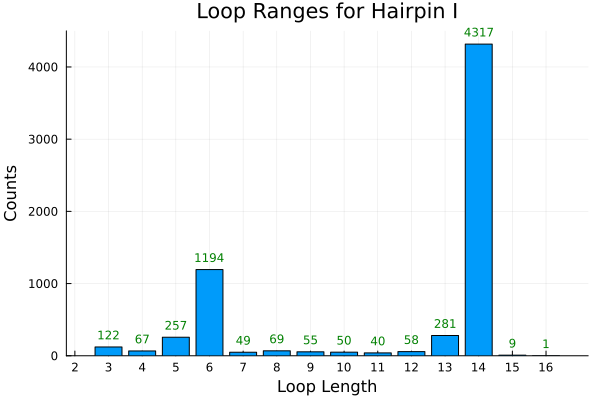

In [76]:
using Plots


# Extract keys and values from the dictionary
entries = collect(keys(Loop_ranges))
counts = collect(values(Loop_ranges))

# Create bar plot
bar(entries, counts, xlabel="Loop Length", ylabel="Counts", title="Loop Ranges for Hairpin I",ylim=(0, 4500), xticks = 0:1:(length(entries)+2),legend = false)

# Annotate the plot with counts
for i in 1:length(entries)
    annotate!(entries[i], counts[i] + 70, text(counts[i], :center, :bottom, 8, :green))
end

# Display the plot
hairpin_plot = plot!()
hairpin_plot

In [77]:
savefig(hairpin_plot,"L1_LoopRanges_plot.png")

"/Users/marlenewerner/Desktop/Diplom/Labo Work/Code for Analysis/RNA_structure_loops/L1_zmerged/L1_LoopRanges_plot.png"

#### Stem

In [64]:
WT_entry = filter(:Lib_Sequence_number => n -> n == "L1S1_0", lib_L1_StructureAnalysis)

Row,Sequence_number,Loop1_description,MFE_SUBstructure,LoopI,Loop_length,Count,WT,MFE_structure,MFE_energy,Mbp_dist,Seq_Cluster,Str_Cluster,Lib_Sequence_number
,Int64,String,String,String,Int64,Int64,String7,String,Float64,Float64,Int64,Int64,String15
1,0,1-4-1-10-5-10-1-4-1,.((((.((((((((((.....)))))))))).)))).,ACAAAAAAACCACCGCTACCAGCGGTGGTTTGTTTGCC,38,47,WT,.((((.((((((((((.....)))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-41.1,5.30195,0,0,L1S1_0


In [65]:
search_set_stem = []
for n = 1: 20
    wt_pre = "1-4-1-"
    wt_loop = "-5-"
    wt_pos = "-1-4-1"
    
    new_item = wt_pre * "$(n)" * wt_loop * "$(n)" * wt_pos
    push!(search_set_stem, new_item)
end
search_set_stem

20-element Vector{Any}:
 "1-4-1-1-5-1-1-4-1"
 "1-4-1-2-5-2-1-4-1"
 "1-4-1-3-5-3-1-4-1"
 "1-4-1-4-5-4-1-4-1"
 "1-4-1-5-5-5-1-4-1"
 "1-4-1-6-5-6-1-4-1"
 "1-4-1-7-5-7-1-4-1"
 "1-4-1-8-5-8-1-4-1"
 "1-4-1-9-5-9-1-4-1"
 "1-4-1-10-5-10-1-4-1"
 "1-4-1-11-5-11-1-4-1"
 "1-4-1-12-5-12-1-4-1"
 "1-4-1-13-5-13-1-4-1"
 "1-4-1-14-5-14-1-4-1"
 "1-4-1-15-5-15-1-4-1"
 "1-4-1-16-5-16-1-4-1"
 "1-4-1-17-5-17-1-4-1"
 "1-4-1-18-5-18-1-4-1"
 "1-4-1-19-5-19-1-4-1"
 "1-4-1-20-5-20-1-4-1"

In [66]:
ForStemAnalysis = filter(:Loop1_description => n -> n ∈ search_set_stem, lib_L1_StructureAnalysis)
sort!(ForStemAnalysis, [:MFE_energy, :Mbp_dist])

Row,Sequence_number,Loop1_description,MFE_SUBstructure,LoopI,Loop_length,Count,WT,MFE_structure,MFE_energy,Mbp_dist,Seq_Cluster,Str_Cluster,Lib_Sequence_number
,Int64,String,String,String,Int64,Int64,String7,String,Float64,Float64,Int64,Int64,String15
1,40857,1-4-1-14-5-14-1-4-1,.((((.((((((((((((((.....)))))))))))))).)))).,ACAAAAAAACCACCGCTTGGGGGCTCTGGGCGGTGGTTTGTTTGCC,46,1,false,.((((.((((((((((((((.....)))))))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-46.8,5.08189,0,0,L1L1_40857
2,23218,1-4-1-14-5-14-1-4-1,.((((.((((((((((((((.....)))))))))))))).)))).,ACAAAAAAACCACCGTAGGTACGTTACTTGCGGTGGTTTGTTTGCC,46,1,false,.((((.((((((((((((((.....)))))))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-44.6,5.42023,0,0,L1L1_23218
3,36208,1-4-1-14-5-14-1-4-1,.((((.((((((((((((((.....)))))))))))))).)))).,ACAAAAAAACCACCGTAGGCATGTCGTCTGCGGTGGTTTGTTTGCC,46,1,false,.((((.((((((((((((((.....)))))))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-44.5,5.29322,0,0,L1L1_36208
4,43338,1-4-1-11-5-11-1-4-1,.((((.(((((((((((.....))))))))))).)))).,ACAAAAAAACCACCGCCCCTGAGGCGGTGGTTTGTTTGCC,40,1,false,.((((.(((((((((((.....))))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-44.4,4.91868,0,0,L1L1_43338
5,14614,1-4-1-13-5-13-1-4-1,.((((.(((((((((((((.....))))))))))))).)))).,ACAAAAAAACCACCGCTGATGGACTTGGCGGTGGTTTGTTTGCC,44,1,false,.((((.(((((((((((((.....))))))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-44.3,5.30705,0,0,L1L1_14614
6,47234,1-4-1-14-5-14-1-4-1,.((((.((((((((((((((.....)))))))))))))).)))).,ACAAAAAAACCACCGTCTTTTTCGGGGAGGCGGTGGTTTGTTTGCC,46,1,false,.((((.((((((((((((((.....)))))))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-43.8,5.65456,0,0,L1L1_47234
7,41128,1-4-1-14-5-14-1-4-1,.((((.((((((((((((((.....)))))))))))))).)))).,ACAAAAAAACCACCGTATTCTGGAAGAGTGCGGTGGTTTGTTTGCC,46,1,false,.((((.((((((((((((((.....)))))))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-43.4,5.5889,0,0,L1L1_41128
8,11488,1-4-1-14-5-14-1-4-1,.((((.((((((((((((((.....)))))))))))))).)))).,ACAAAAAAACCACCGCGGTTTGCCTGATTGCGGTGGTTTGTTTGCC,46,1,false,.((((.((((((((((((((.....)))))))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-43.3,5.68309,0,0,L1L1_11488
9,48671,1-4-1-11-5-11-1-4-1,.((((.(((((((((((.....))))))))))).)))).,ACAAAAAAACCACCGCTTGGATGGCGGTGGTTTGTTTGCC,40,1,false,.((((.(((((((((((.....))))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-43.1,4.93391,0,0,L1L1_48671


In [67]:
## sorting the structures with relative similarity by their actual Loop2_description
StemSame_structure = []
for structure in ForStemAnalysis.MFE_SUBstructure
    if structure ∉ StemSame_structure && structure != wild_type_pattern
        push!(StemSame_structure, structure)
    end
end
StemSame_structure

11-element Vector{Any}:
 ".((((.((((((((((((((.....)))))))))))))).))))."
 ".((((.(((((((((((.....))))))))))).))))."
 ".((((.(((((((((((((.....))))))))))))).))))."
 ".((((.((((((((((.....)))))))))).))))."
 ".((((.((((((((((((.....)))))))))))).))))."
 ".((((.(((((((((.....))))))))).))))."
 ".((((.((((((((.....)))))))).))))."
 ".((((.(((((((.....))))))).))))."
 ".((((.((((((.....)))))).))))."
 ".((((.(((((.....))))).))))."
 ".((((.((((.....)))).))))."

In [68]:
## getting an overview on the stem sizes of the hairpin structures
x_values = find_x_values(ForStemAnalysis.Loop1_description)

println("Range of Stem bases:")
println(sort!(collect(x_values)))



Range of Stem bases:
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [69]:
Stem_ranges = Dict{Int64,Int64}()
for num in sort!(collect(x_values))
    Loop1_desc = "1-4-1-$(num)-5-$(num)-1-4-1"
    seq_dataframe = filter(:Loop1_description => n -> n == Loop1_desc, lib_L1_StructureAnalysis)
    count_seq = nrow(seq_dataframe)
    Stem_ranges[num] = count_seq
end
Stem_ranges

Dict{Int64, Int64} with 11 entries:
  5  => 71
  12 => 3
  8  => 57
  6  => 115
  11 => 14
  9  => 144
  14 => 9
  7  => 17
  4  => 6
  13 => 2
  10 => 99

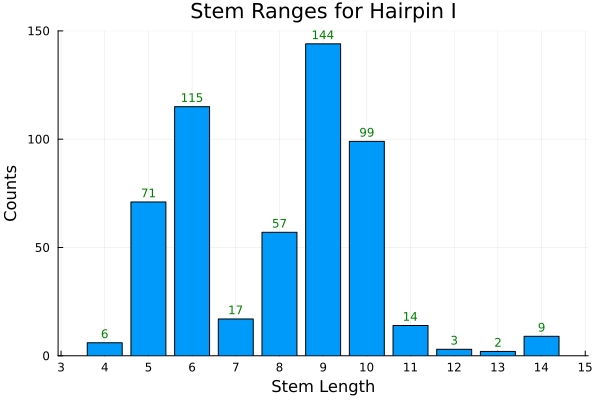

In [70]:
# Extract keys and values from the dictionary
entries = collect(keys(Stem_ranges))
counts = collect(values(Stem_ranges))

# Create bar plot
bar(entries, counts, xlabel="Stem Length", ylabel="Counts", title="Stem Ranges for Hairpin I",  xticks = 0:1:(length(entries)+5), ylim=(0, 150), legend = false)

# Annotate the plot with counts
for i in 1:length(entries)
    annotate!(entries[i], counts[i] + 1, text(counts[i], :center, :bottom, 8, :green))
end

# Display the plot
hairpin_plot = plot!()
hairpin_plot

In [75]:
# saving the plot as png image
savefig(hairpin_plot,"L1_StemRanges_plot.png")

"/Users/marlenewerner/Desktop/Diplom/Labo Work/Code for Analysis/RNA_structure_loops/L1_zmerged/L1StemRanges_plot.png"

### Clustering and Filtering Sequences

In [23]:
using DataFrames
using CSV

function nucleotide_difference(sequence1::String, sequence2::String)
    return sum(a != b for (a, b) in zip(sequence1, sequence2))
end

function combine_identical_sequences(sequences::Vector{String}, counts::Vector{Int})
    n = length(sequences)
    
    # Create a dictionary to store cumulative counts for identical sequences
    cumulative_counts = Dict{String, Int}()
    
    for i in 1:n
        current_sequence = sequences[i]
        if haskey(cumulative_counts, current_sequence)
            cumulative_counts[current_sequence] += counts[i]
        else
            cumulative_counts[current_sequence] = counts[i]
        end
    end
    
    # Create a new DataFrame with combined sequences and counts
    combined_df = DataFrame(Sequence = [], Count = [])
    
    for (sequence, count) in pairs(cumulative_counts)
        push!(combined_df, [sequence, count])
    end
    
    return combined_df
end

function cluster_sequences_by_difference_and_count(sequences::Vector, difference_threshold::Int, structure::String, original_counts::Vector)
    n = length(sequences)
    
    # Create a DataFrame to store the sequences and their original counts
    count_df = DataFrame(Sequence = sequences, Count = original_counts)
    
    # Sort sequences by count in descending order
    sort!(count_df, [:Count, :Sequence], rev=[true, false])
    
    # Initialize the current cluster ID
    current_cluster = 0
    
    # Initialize an array to store the cluster assignment for each sequence
    clusters = zeros(Int, n)
    
    for i in 1:n
        # If the current sequence is not assigned to any cluster, create a new cluster
        if clusters[i] == 0
            current_cluster += 1
            clusters[i] = current_cluster
            
            # Find sequences with the specified difference threshold and assign them to the same cluster
            for j in (i+1):n
                if clusters[j] == 0 && nucleotide_difference(sequences[i], sequences[j]) <= difference_threshold
                    clusters[j] = clusters[i]
                end
            end
        end
    end
    
    # Create a DataFrame to store the clustering result
    df = DataFrame(LoopI_description = fill(structure, n), Sequence = sequences, Count = original_counts, Cluster = clusters)

    # Create a count table
    count_table = combine(groupby(df, [:Cluster, :Sequence]), nrow)

    # Write count table to CSV
    CSV.write("$(structure)_count_table.csv", count_table)

    # Iterate over clusters and write sequences to FASTA files
    for cluster_id in 1:maximum(clusters)
        cluster_sequences = df[df.Cluster .== cluster_id, :].Sequence
        fasta_content = join(">sequence_$i\n$s\n" for (i, s) in enumerate(cluster_sequences))
        write("$(structure)_dif$(difference_threshold)_cluster_$cluster_id.fasta", fasta_content)
    end

    return count_df, df, count_table
end

Structure = "1-4-1-14-5-14-1-4-1"
LongestLoopAnalysis = filter(:Loop1_description => n -> n == Structure, lib_AllStructAnalysis)
sort!(LongestLoopAnalysis, [:Count])

# Replace this with your actual sequence data and counts
sequences = LongestLoopAnalysis.LoopI
original_counts = LongestLoopAnalysis.Count

# Combine identical sequences and sum their counts
combined_df = sort!(combine_identical_sequences(sequences, original_counts), :Count, rev = true)

# Replace this with your actual sequence data and counts
combined_sequences = combined_df.Sequence
counts = combined_df.Count

# Set the threshold for clustering based on nucleotide differences
difference_threshold = 1

# Cluster the sequences, create FASTA files, and generate count table
count_df, result_df, count_table = cluster_sequences_by_difference_and_count(combined_sequences, difference_threshold, Structure, counts)

# Display the DataFrame and count table

@show(count_df)
#show(sort!(result_df, [:Cluster, :Count]), allcols=true)

display(count_table)

using PrettyTables

# Calculate the number of sequences per cluster
cluster_counts = combine(groupby(result_df, :Cluster), :Count => sum => :Total_Count)

# Sort the table by total count in descending order
cluster_counts = sort(cluster_counts, :Total_Count, rev=true)

# Display the table
pretty_table(cluster_counts, crop=:none)

####new



# Calculate the number of sequences per cluster
cluster_counts = combine(groupby(result_df, :Cluster), :Count => sum => :Total_Count)

# Sort the table by total count in descending order
cluster_counts = sort(cluster_counts, :Total_Count, rev=true)

# Display the table of total counts
pretty_table(cluster_counts, crop=:none)

# Iterate over clusters and display tables for counts per sequence
for cluster_id in 1:maximum(result_df.Cluster)
    cluster_name = "Cluster $cluster_id"
    cluster_sequences_table = result_df[result_df.Cluster .== cluster_id, [:Sequence, :Count]]
    println("\n$cluster_name:")
    pretty_table(cluster_sequences_table, crop=:none)
end

count_df = 9×2 DataFrame
 Row │ Sequence                           Count
     │ Any                                Any
─────┼──────────────────────────────────────────
   1 │ ACAAAAAAACCACCGCGGTTTGCCTGATTGCG…  1
   2 │ ACAAAAAAACCACCGCTTGGGGGCTCTGGGCG…  1
   3 │ ACAAAAAAACCACCGTAGGCATGTCGTCTGCG…  1
   4 │ ACAAAAAAACCACCGTAGGTACGTTACTTGCG…  1
   5 │ ACAAAAAAACCACCGTATTCTGGAAGAGTGCG…  1
   6 │ ACAAAAAAACCACCGTATTTCTGTCAAGTGCG…  1
   7 │ ACAAAAAAACCACCGTCTTTTTCGGGGAGGCG…  1
   8 │ ACAAAAAAACCACCGTGGAGTGATATTTCGCG…  1
   9 │ ACAAAAAAACCACCGTTGGGAATCTTTTAGCG…  1


Row,Cluster,Sequence,nrow
,Int64,Any,Int64
1,1,ACAAAAAAACCACCGTAGGCATGTCGTCTGCGGTGGTTTGTTTGCC,1
2,2,ACAAAAAAACCACCGCTTGGGGGCTCTGGGCGGTGGTTTGTTTGCC,1
3,3,ACAAAAAAACCACCGTATTTCTGTCAAGTGCGGTGGTTTGTTTGCC,1
4,4,ACAAAAAAACCACCGTCTTTTTCGGGGAGGCGGTGGTTTGTTTGCC,1
5,5,ACAAAAAAACCACCGTATTCTGGAAGAGTGCGGTGGTTTGTTTGCC,1
6,6,ACAAAAAAACCACCGCGGTTTGCCTGATTGCGGTGGTTTGTTTGCC,1
7,7,ACAAAAAAACCACCGTGGAGTGATATTTCGCGGTGGTTTGTTTGCC,1
8,8,ACAAAAAAACCACCGTAGGTACGTTACTTGCGGTGGTTTGTTTGCC,1
9,9,ACAAAAAAACCACCGTTGGGAATCTTTTAGCGGTGGTTTGTTTGCC,1


LoadError: ArgumentError: Package PrettyTables not found in current path, maybe you meant `import/using .PrettyTables`.
- Otherwise, run `import Pkg; Pkg.add("PrettyTables")` to install the PrettyTables package.

In [24]:
#number = "L1L1_30443"
#getSeq = filter(:Lib_Sequence_number => n -> n == number, lib_AllStructAnalysis)
#getSeq
# Load FASTA file as an Array of String
function load_fasta_file(file_name::String)
    R0 = []
    reader = FASTA.Reader(open(file_name, "r"))
    for record in reader
        push!(R0, convert(String, FASTA.sequence(record)))
    end
    close(reader)
    return R0
end


# Replace "your_file.fasta" with the actual path to your FASTA file
fasta_file_path1 = "1-4-1-8-5-8-1-4-1_dif1_cluster_1.fasta"
sequences1 = load_fasta_file(fasta_file_path1)

fasta_file_path2 = "1-4-1-8-5-8-1-4-1_dif1_cluster_2.fasta"
sequences2 = load_fasta_file(fasta_file_path2)

fasta_file_path3 = "1-4-1-8-5-8-1-4-1_dif1_cluster_3.fasta"
sequences3 = load_fasta_file(fasta_file_path3)

#fasta_file_path4 = "1-4-1-8-5-8-1-4-1_dif1_cluster_3.fasta"
#sequences4 = load_fasta_file(fasta_file_path4)


Seq = vcat(sequences1, sequences2, sequences3)
Top3Clusters = filter(:LoopI => n -> n ∈ Seq, lib_AllStructAnalysis)
sort!(Top3Clusters, [:MFE_energy])
display(Top3Clusters)



save_name = "1-4-1-8-5-8-1-4-1_top3Clusters" * ".csv"

## Saving results
CSV.write(save_name, Top3Clusters)



LoadError: SystemError: opening file "1-4-1-8-5-8-1-4-1_dif1_cluster_1.fasta": No such file or directory

In [25]:
structure = "1-4-1-8-5-8-1-4-1"
PickbyEnergy = filter(:Loop1_description => n -> n == structure, lib_AllStructAnalysis)
#sort!(PickbyEnergy, [:MFE_energy])
sort!(PickbyEnergy, [:Sequence_number])
display(PickbyEnergy)

save_name = "1-4-1-8-5-8-1-4-1_EnergyPick" * ".csv"

## Saving results
#CSV.write(save_name, PickbyEnergy)

Row,Sequence_number,Loop1_description,MFE_SUBstructure,LoopI,Loop_length,Count,WT,MFE_structure,MFE_energy,Mbp_dist,Seq_Cluster,Str_Cluster,Lib_Sequence_number
,Int64,String,String,String,Int64,Int64,String7,String,Float64,Float64,Int64,Int64,String
1,4,1-4-1-8-5-8-1-4-1,.((((.((((((((.....)))))))).)))).,ACAAAAAAACCACCGGGGCGGTGGTTTGTTTGCC,34,146,false,.((((.((((((((.....)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-35.6,5.40284,0,0,L1L1_4
2,5,1-4-1-8-5-8-1-4-1,.((((.((((((((.....)))))))).)))).,ACAAAAAAACCACCGGTGCGGTGGTTTGTTTGCC,34,116,false,.((((.((((((((.....)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-35.6,5.40283,0,0,L1L1_5
3,6,1-4-1-8-5-8-1-4-1,.((((.((((((((.....)))))))).)))).,ACAAAAAAACCACCGGCGCGGTGGTTTGTTTGCC,34,76,false,.((((.((((((((.....)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-35.6,5.40283,0,0,L1L1_6
4,7,1-4-1-8-5-8-1-4-1,.((((.((((((((.....)))))))).)))).,ACAAAAAAACCACCGATGCGGTGGTTTGTTTGCC,34,74,false,.((((.((((((((.....)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-35.6,5.40282,0,0,L1L1_7
5,8,1-4-1-8-5-8-1-4-1,.((((.((((((((.....)))))))).)))).,ACAAAAAAACCACCGAGGCGGTGGTTTGTTTGCC,34,69,false,.((((.((((((((.....)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-35.6,5.40283,0,0,L1L1_8
6,9,1-4-1-8-5-8-1-4-1,.((((.((((((((.....)))))))).)))).,ACAAAAAAACCACCGGAGCGGTGGTTTGTTTGCC,34,68,false,.((((.((((((((.....)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-35.6,5.40282,0,0,L1L1_9
7,11,1-4-1-8-5-8-1-4-1,.((((.((((((((.....)))))))).)))).,ACAAAAAAACCACCGAAGCGGTGGTTTGTTTGCC,34,46,false,.((((.((((((((.....)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-35.6,5.40282,0,0,L1L1_11
8,12,1-4-1-8-5-8-1-4-1,.((((.((((((((.....)))))))).)))).,ACAAAAAAACCACCGACGCGGTGGTTTGTTTGCC,34,31,false,.((((.((((((((.....)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-35.6,5.40282,0,0,L1L1_12
9,15,1-4-1-8-5-8-1-4-1,.((((.((((((((.....)))))))).)))).,ACAAAAAAACCACCGTAGCGGTGGTTTGTTTGCC,34,23,false,.((((.((((((((.....)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-35.6,5.40282,0,0,L1L1_15


"1-4-1-8-5-8-1-4-1_EnergyPick.csv"

In [26]:
seq = "ACAAAAAAACCACCGGGGCGGTGGTTTGTTTGCC"
Sequence = filter(:LoopI => n -> n == seq, lib_AllStructAnalysis)

Row,Sequence_number,Loop1_description,MFE_SUBstructure,LoopI,Loop_length,Count,WT,MFE_structure,MFE_energy,Mbp_dist,Seq_Cluster,Str_Cluster,Lib_Sequence_number
,Int64,String,String,String,Int64,Int64,String7,String,Float64,Float64,Int64,Int64,String
1,4,1-4-1-8-5-8-1-4-1,.((((.((((((((.....)))))))).)))).,ACAAAAAAACCACCGGGGCGGTGGTTTGTTTGCC,34,146,false,.((((.((((((((.....)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).........,-35.6,5.40284,0,0,L1L1_4


In [37]:
seq = "L3L_30"
PickbyEnergy = filter(:Lib_Sequence_number => n -> n == seq, lib_AllStructAnalysis)
#sort!(PickbyEnergy, [:MFE_energy])
#sort!(PickbyEnergy, [:Sequence_number])

Row,Sequence_number,Loop1_description,MFE_SUBstructure,LoopI,Loop_length,Count,WT,MFE_structure,MFE_energy,Mbp_dist,Seq_Cluster,Str_Cluster,Lib_Sequence_number
,Int64,String,String,String,Int64,Int64,String7,String,Float64,Float64,Int64,Int64,String
